In [62]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [80]:
data =pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [82]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [83]:
# Renaming columns
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [84]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [85]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


#Hierarchical

In [13]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data_airline.iloc[:,1:])

In [17]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


<Figure size 1440x720 with 0 Axes>

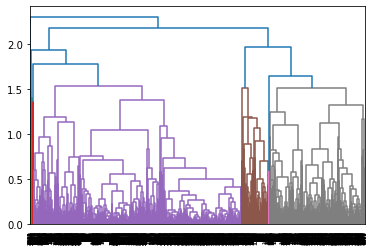

<Figure size 1440x720 with 0 Axes>

In [24]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.figure(figsize=(20,10))


In [26]:
#AgglomerativeClustering

sklearn.cluster._agglomerative.AgglomerativeClustering

In [57]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')      # "euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed".
hc

AgglomerativeClustering(linkage='single', n_clusters=5)

In [28]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [31]:
data_airline['h_clusterid'] = y_hc 
data_airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
data_airline.groupby(["h_clusterid"])["ID#"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID#, dtype: object

In [34]:
data_airline[data_airline["ID#"].isin(["PennState","Purdue","UWisconsin"])]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid


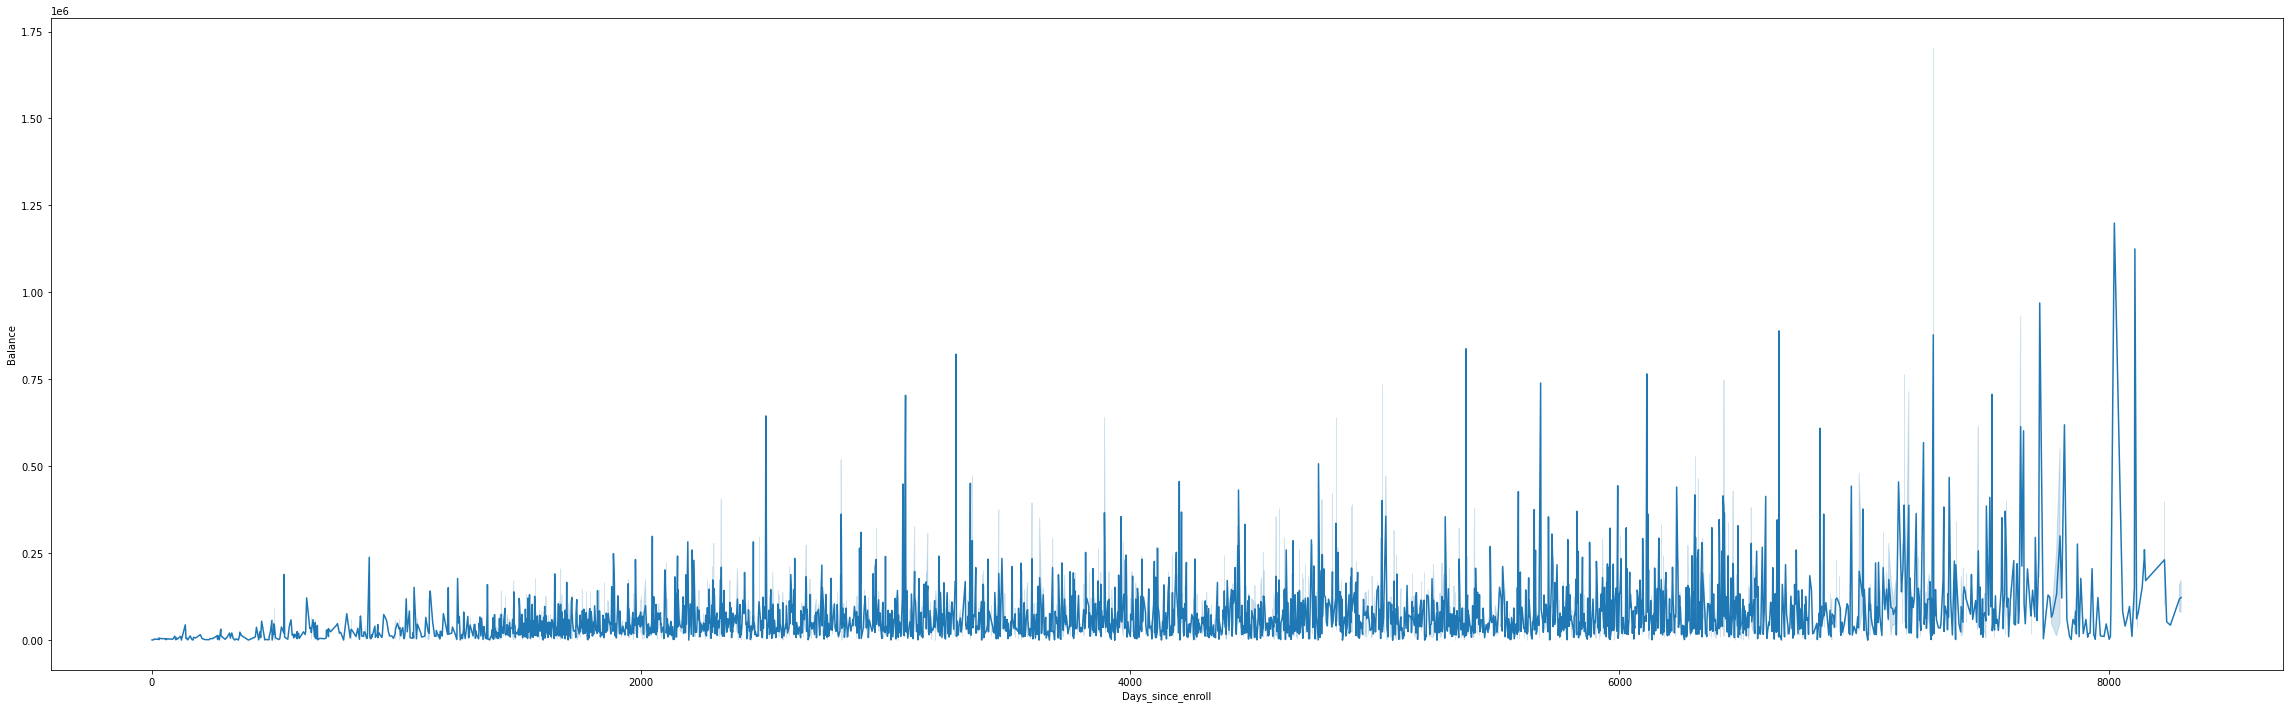

In [49]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data_airline)

In [86]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [53]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [54]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data_airline)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data_airline)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.84374246 0.         0.        ]
 [0.01128788 0.         0.         ... 0.83988425 0.         0.        ]
 [0.02425685 0.         0.         ... 0.84784181 0.         0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.16879672 1.         0.25      ]
 [0.03220189 0.         0.         ... 0.16867615 0.         0.        ]
 [0.00176908 0.         0.         ... 0.16831444 0.         0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ...  1.39545434e+00
  -7.66919299e-01 -7.61281465e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ...  1.37995704e+00
  -7.66919299e-01 -7.61281465e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ...  1.41192021e+00
  -7.66919299e-01 -7.61281465e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -1.31560393e+00
   1.30391816e+00  1.28603836e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31608822e+00
  -7.66919299e-01 -7.61281465e-01]
 [-7.00507951e-01 -1.862

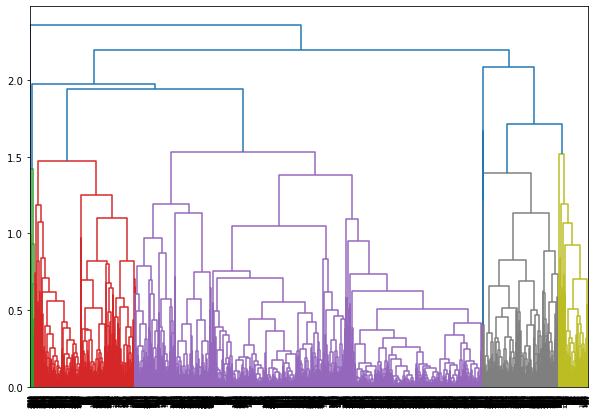

In [55]:
# Create Dendrograms for scaler1_daf ie minmaxscaler
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

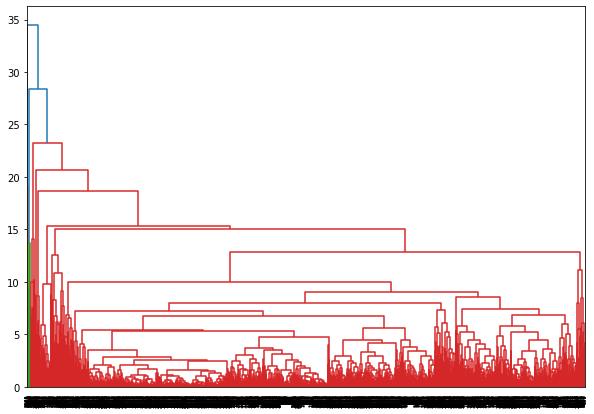

In [56]:
# Create Dendrograms for scaler2_daf
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [87]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [88]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     955
2     808
4     699
3     526
Name: clustersid, dtype: int64

In [89]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

In [90]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3736538764335815

In [91]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

0    2481
2    1286
1     171
3      43
4      18
Name: clustersid, dtype: int64

In [92]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

In [93]:
# silhouette_score of AgglomerativeClustering
sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3493011006914416

#K-MEANS Clustering

In [94]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [95]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [96]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.        ]
 [0.01128788 0.         0.         ... 0.         0.25       0.        ]
 [0.02425685 0.         0.         ... 0.         0.25       0.        ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.5       ]
 [0.03220189 0.         0.         ... 0.         1.         0.        ]
 [0.00176908 0.         0.         ... 0.         1.         0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.33948724e-01 -7.52971369e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.33948724e-01 -7.52971369e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.33948724e-01 -7.52971369e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.24522819e+00  1.29263495e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59988966e+00 -7.52971369e-01]
 [-7.00507951e-01 -1.862

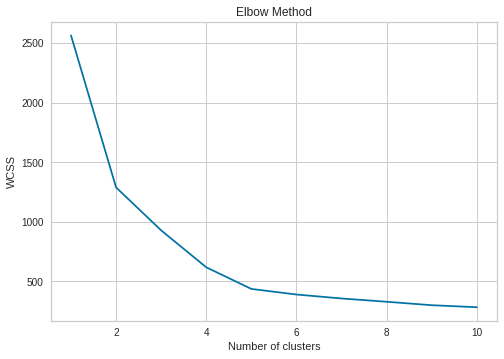

In [97]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

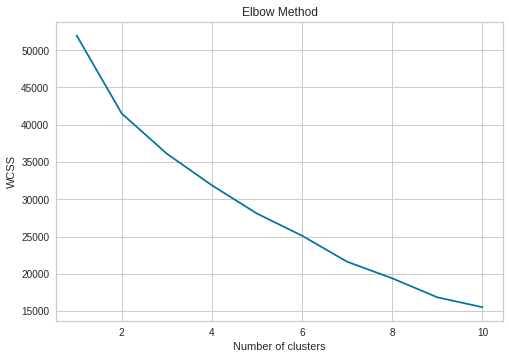

In [98]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above two Scree plots, optimum number of clusters can be selected equal to 5

In [99]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5708701783591363
Silhouette Score for data normalized by StandardScaler:  0.3457523448374029


In [100]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [101]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    1196
0     952
3     699
4     623
2     529
Name: clusterid_Kmeans, dtype: int64

In [102]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,80443.741597,277.255252,1.703782,1.024160,1.002101,12439.525210,12.450630,877.294118,2.623950,4359.436975,1.0,0.000000,1.908613
1,1,46971.773411,85.259197,1.145485,1.028428,1.006689,3761.719064,6.646321,158.618729,0.484114,4834.708194,0.0,1.154682,0.072742
2,2,126943.529301,173.504726,4.385633,1.000000,1.047259,58537.790170,21.778828,821.880907,2.555766,5103.086957,1.0,2.982987,1.880907
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000,0.014306
4,4,117878.845907,80.373997,3.571429,1.001605,1.022472,31252.101124,17.348315,228.321027,0.643660,4400.409310,0.0,2.000000,0.056180


#DBSCAN

In [103]:
from sklearn.cluster import DBSCAN

In [104]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.25       0.         0.25      ]
 [0.01128788 0.         0.         ... 0.25       0.         0.25      ]
 [0.02425685 0.         0.         ... 0.25       0.         0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.5        0.        ]
 [0.03220189 0.         0.         ... 1.         0.         0.75      ]
 [0.00176908 0.         0.         ... 1.         0.         0.75      ]]


In [105]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [106]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [107]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [108]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.46942290898646655

As more than 50% of data is in one cluster, we will try for lower value of epsilon

In [109]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2485
 2     955
 1     525
 3      26
-1       8
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4645149278017337


In [111]:
data['clusterid_DBSCAN'] = dbscan1.labels_
data1['clusterid_DBSCAN'] = dbscan1.labels_

In [112]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2,2,1


In [113]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184279.375000,0.000000,2.875000,1.000000,4.000000,74862.875000,24.375000,350.000000,1.000000,4251.250000,0.125,2.125000,4.000000,3.000000
1,0,59532.345674,88.765795,1.709054,1.000402,1.000402,10044.412877,9.049095,226.661569,0.651911,3821.531590,0.000,2.166197,0.010060,2.308652
2,1,127112.992381,153.868571,4.386667,1.000000,1.040000,58432.598095,21.691429,798.428571,2.478095,5113.466667,1.000,3.000000,1.883810,2.000000
3,2,80612.997906,287.905759,1.714136,1.024084,1.002094,12586.004188,12.534031,890.873298,2.669110,4355.310995,1.000,0.000000,1.904712,0.006283
4,3,46148.500000,0.000000,1.000000,2.307692,1.038462,11777.807692,13.692308,144.230769,0.576923,3681.192308,0.000,1.000000,3.038462,1.000000
